In [1]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 6
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

Set the matrix and check the matrix multiplications set correctly. 

In [2]:
G = np.array([[3/4, 1/2],[1/2, 1]])
G2 = np.array([[2, -1],[-1, 3/2]])

In [8]:
W = np.linalg.inv(G)
W2 = np.linalg.inv(G2)

In [11]:
N =100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)

In [12]:
ax , ay = np.dot(W, [x, y])
ax2 , ay2 = np.dot(W2, [x, y])

In [13]:
zx, zy  = -np.tanh(ax), -np.tanh(ay)
zx2, zy2  = -np.tanh(ax2), -np.tanh(ay2)

In [14]:
px, py = 1/np.cosh(ax), 1/np.cosh(ay)
px2, py2 = 1/np.cosh(ax2), 1/np.cosh(ay2)

from given datapoints (x, y), find the target density distribution 

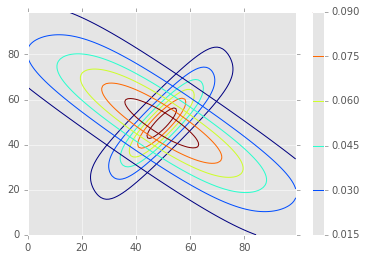

In [69]:

N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z , Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=1/3.141411/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[1]
for i in range(N):
    for j in range(N):
         Z2[i,j]=1/3.14141*1/np.cosh(np.dot(W2, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(W2, [X[i,j], Y[i,j]]))[1]        
plt.contour(Z)
plt.contour(Z2)
plt.colorbar()
plt.show()

In [16]:
# center at origin, and 1 at center. 

def Cauchy(x):
    return 3.14141/(1+np.pi**2*x**2)

In [17]:
Cauchy(0)

3.141410

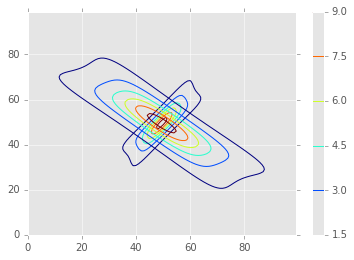

In [70]:

N = 100
x, y = np.linspace(-2,2, N), np.linspace(-2,2, N)
X, Y = np.meshgrid(x, y)
Z, Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[1]
        
for i in range(N):
    for j in range(N):
         Z2[i,j]=Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[1]
        
plt.contour(Z)
plt.contour(Z2)
plt.colorbar()
plt.show()


In [19]:
Z.min(), Z.max()

(0.000112, 9.818978)

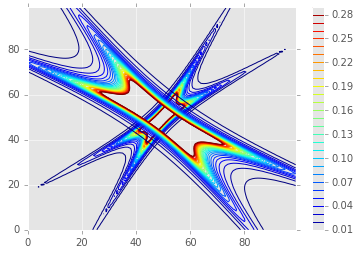

In [20]:

N = 100
x, y = np.linspace(-8,8, N), np.linspace(-8,8, N)
X, Y = np.meshgrid(x, y)
Z, Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[1]
        
for i in range(N):
    for j in range(N):
         Z2[i,j]=Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[1]

contour_levels = np.arange(0.01, 0.3, 0.01)
plt.contour(Z, contour_levels )
plt.contour(Z2, contour_levels )
plt.colorbar()



learning algorithm 

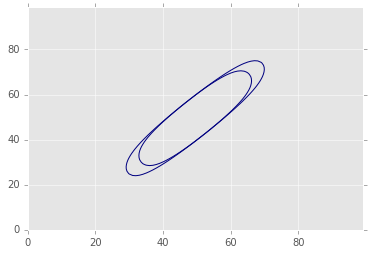

In [65]:

N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

for i in range(N):
    for j in range(N):
         Z[i,j]=1/3.14141*1/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[1]

plt.contour(Z, np.array([0.04]))


dW = np.linalg.inv(np.transpose(W))+np.dot([-np.tanh(np.dot(W, [x, y]))], np.transpose([x,y]))


epsilon = 0.0004
WN = W+epsilon *dW[0]

Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]
        
plt.contour(Z, np.array([0.04]))
plt.show()

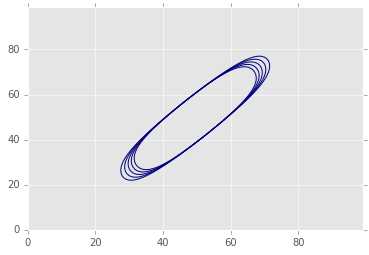

In [66]:
plt.hold(False)
N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0001
WN = W
while turns <5:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]

    plt.contour(Z, np.array([0.035]))
    plt.hold(True)
    dW = np.linalg.inv(np.transpose(WN))+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose([x,y]))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
    
plt.show()

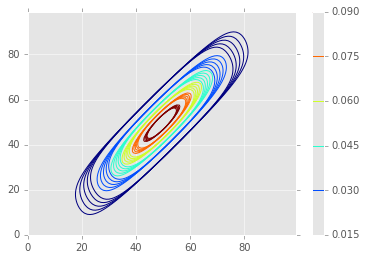

In [67]:
plt.hold(False)
N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0001
WN = W
while turns <5:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]

    plt.contour(Z)
    plt.hold(True)
    dW = np.linalg.inv(np.transpose(WN))+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose([x,y]))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
plt.colorbar()
plt.show()

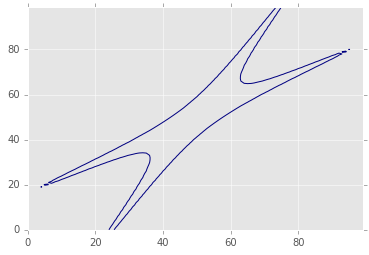

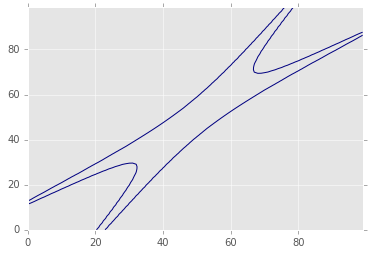

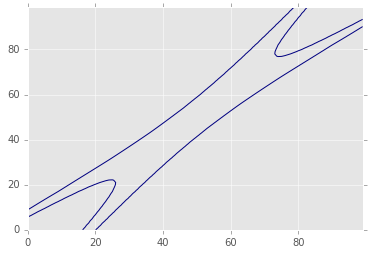

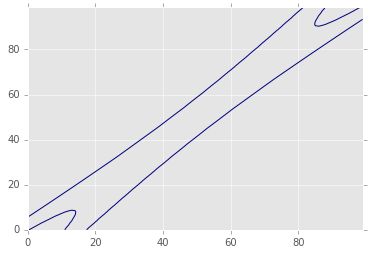

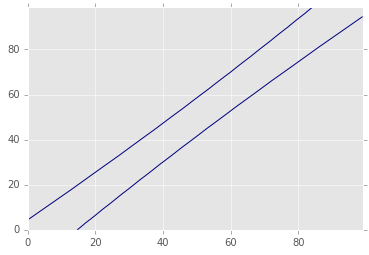

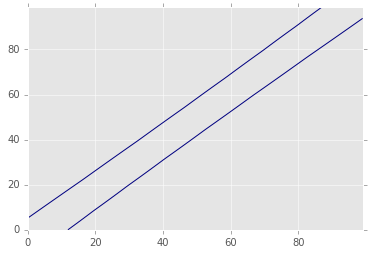

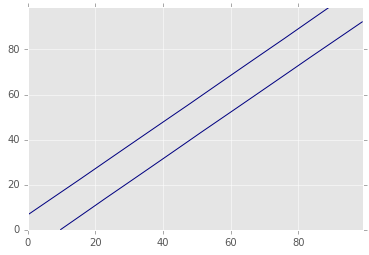

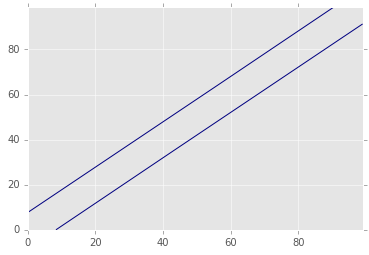

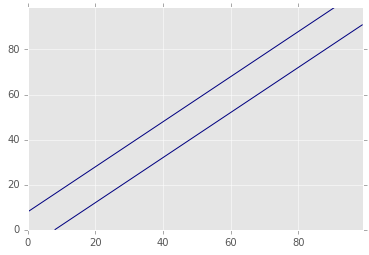

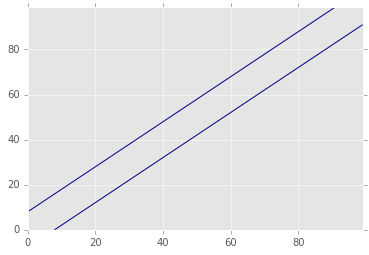

In [84]:
plt.hold(False)
N = 100
x, y = np.linspace(-8,8, N), np.linspace(-8,8, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0002
WN = W
while turns <10:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=Cauchy(np.dot(WN, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(WN, [X[i,j], Y[i,j]]))[1]


    plt.contour(Z, np.array([0.01]))
    plt.hold(True)
    dW = np.linalg.inv(np.transpose(WN))+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose([x,y]))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
    plt.show()
    


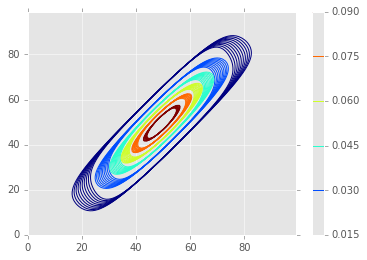

In [81]:
# covaraint 

plt.hold(False)
N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0001
WN = W
while turns <10:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]

    plt.contour(Z)
    plt.hold(True)
    dW = WN+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose(np.dot(np.dot(np.transpose(WN), WN),[x,y])))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
plt.colorbar()
plt.show()

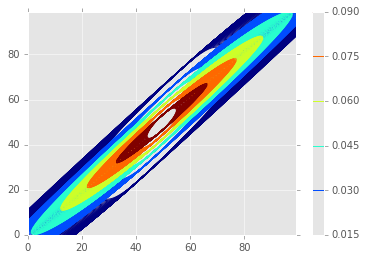

8.592851

In [78]:
# covaraint 


import time
start_time = time.time()


plt.hold(False)
N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0001
WN = W
while turns <100:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]

    plt.contour(Z)
    plt.hold(True)
    dW = WN+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose(np.dot(np.dot(np.transpose(WN), WN),[x,y])))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
plt.colorbar()
plt.show()

time.time() - start_time

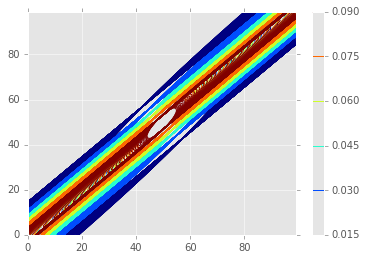

8.563153

In [79]:
#non-covariant

import time
start_time = time.time()



plt.hold(False)
N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((N,N))

G = np.array([[3/4, 1/2],[1/2, 1]])
W = np.linalg.inv(G)

turns = 0
epsilon = 0.0001
WN = W
while turns <100:
    

    Z  = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Z[i,j]=1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/3.14141*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]

    plt.contour(Z)
    plt.hold(True)
    dW = np.linalg.inv(np.transpose(WN))+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose([x,y]))

    
    WN= WN+epsilon *dW[0]
    
    turns +=1
plt.colorbar()
plt.show()

time.time() - start_time